<a href="https://colab.research.google.com/github/vannis422/vision/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 使用 wget 指令下載資料集
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2025-06-25 14:33:43--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.1’

cifar-10-python.tar 100%[===================>] 162.60M  32.1MB/s    in 5.7s    

2025-06-25 14:33:50 (28.3 MB/s) - ‘cifar-10-python.tar.gz.1’ saved [170498071/170498071]



In [2]:
# 使用 tar -xvf 進行解壓縮
# 可參考 https://note.drx.tw/2008/04/command.html
!tar -xvf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from PIL import Image
import torch
import torchvision
import os
from sklearn.metrics import accuracy_score
with open("cifar-10-batches-py/batches.meta", "rb") as f:
    label_names = pickle.load(f, encoding='bytes')[b'label_names']
    label_names = [label.decode("utf-8") for label in label_names]

print(label_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
    return dict


tmp = unpickle("cifar-10-batches-py/data_batch_1")
print(type(tmp))
print(tmp.keys())

<class 'dict'>
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [5]:
print(tmp[b'data'].shape)
print(tmp[b'labels'])
print(tmp[b'data'][0])
print(tmp[b'data'][0].shape)

(10000, 3072)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8

In [6]:

def save_images_from_batch(batch_data, batch_labels, batch_idx, split, output_dir):
    for i in range(len(batch_data)):
        img_array = batch_data[i] # 每組 batch 的 shape: 張數 x 3096
        label = batch_labels[i]

        img_reshaped = np.reshape(img_array, (3, 32, 32))  # shape: [3, 32, 32]
        img = np.transpose(img_reshaped, (1, 2, 0))
        img = Image.fromarray(img) # 將數值資料轉為影像資料

        class_dir = os.path.join(output_dir, split, str(label))
        os.makedirs(class_dir, exist_ok=True)

        img_filename = os.path.join(class_dir, f"{split}_{batch_idx}_{i:04d}.png")
        img.save(img_filename)


def convert_raw_to_images(cifar_dir: str = "cifar-10-batches-py", output_dir: str = "cifar10"):
    os.makedirs(output_dir, exist_ok=True)

    # 處理訓練集
    for i in range(1, 6):
        batch = unpickle(os.path.join(cifar_dir, f"data_batch_{i}"))
        data = batch[b'data']
        labels = batch[b'labels']
        save_images_from_batch(
            batch_data=data,
            batch_labels=labels,
            batch_idx=i,
            split="train",
            output_dir=output_dir,
        )

    # 處理測試集
    test_batch = unpickle(os.path.join(cifar_dir, "test_batch"))
    save_images_from_batch(
        batch_data=test_batch[b'data'],
        batch_labels=test_batch[b'labels'],
        batch_idx=0,
        split="test",
        output_dir=output_dir,
    )


# 執行資料前處理

convert_raw_to_images()

In [7]:
class CIFAR10ImageFolder(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        """
        root_dir: 資料夾路徑，例如 'cifar10/train'
        transform: torchvision.transforms 用來轉換 PIL 圖片
        """
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        class_names = sorted(os.listdir(root_dir)) # 列出 `root_dir` 底下有哪些類別資料夾，並由小至大排序
        for idx, class_name in enumerate(class_names):
            class_folder = os.path.join(root_dir, class_name)
            if not os.path.isdir(class_folder):
                continue

            for filename in os.listdir(class_folder):
                if filename.endswith(('.png', '.jpg')):
                    # TODO2-1: 將所有的檔案路徑都收集到 `self.image_paths`
                    img_path = os.path.join(class_folder, filename)
                    self.image_paths.append(img_path)

                    # TODO2-2: 將所有的 label_id 都收集到 `self.labels`
                    self.labels.append(idx)

    def __getitem__(self, idx):
        # TODO2-3: 取得 idx 所對應的檔案路徑
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')  # 讀成 RGB 模式

        if self.transform:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.image_paths)

In [8]:
# 定義資料數值轉換
transform = torchvision.transforms.Compose([
    # transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),  # (HWC, uint8) → (CHW, float32 [0,1])
    torchvision.transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])


# 建立 Dataset
train_dataset = CIFAR10ImageFolder(root_dir='cifar10/train', transform=transform)
test_dataset = CIFAR10ImageFolder(root_dir='cifar10/test', transform=transform)


train_labels = [example[1] for example in train_dataset]
test_labels = [example[1] for example in test_dataset]


import collections
print(collections.Counter(train_labels))
print(collections.Counter(test_labels))

Counter({0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000})
Counter({0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000})


In [9]:
# 從 train_dataset 切出 validation_dataset

from torch.utils.data import random_split

validation_ratio = 0.2
total_len = len(train_dataset)
val_size = int(validation_ratio * total_len)
train_size = total_len - val_size

train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

In [10]:
#超參數
LR = 0.001
train_batch_size = 64
test_batch_size = 128
num_epochs = 10

In [11]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# 定義 transform（影像轉 tensor + 正規化）
transform = transforms.Compose([
    transforms.ToTensor(),  # 轉成 tensor（shape: [C, H, W]）
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 平均值/標準差（三通道）
])

# 建立 datasets
train_dataset = ImageFolder(root="cifar10/train", transform=transform)
test_dataset = ImageFolder(root="cifar10/test", transform=transform)

# 將 train dataset 分成 train / val（9:1 比例）
from torch.utils.data import random_split
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42))

# ✅ TODO3: 建立 DataLoader
train_loader = torch.utils.data.DataLoader(
    train_subset,
    batch_size=128,
    shuffle=True
)
val_loader = torch.utils.data.DataLoader(
    val_subset,
    batch_size=128,
    shuffle=False
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=128,
    shuffle=False
)

# 驗證一個 batch
for images, labels in test_loader:
    print("Image shape:", images.shape)  # [B, 3, 32, 32]
    print("Label shape:", labels.shape)  # [B]
    break


Image shape: torch.Size([128, 3, 32, 32])
Label shape: torch.Size([128])


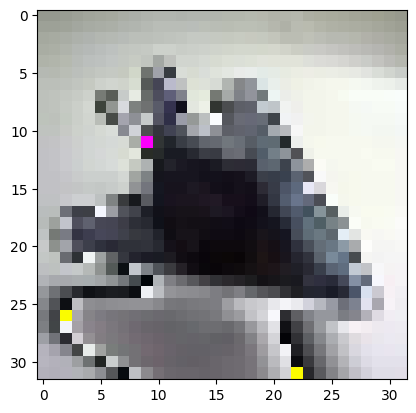

In [12]:
# 驗證一個 example
example_img, example_label = train_dataset[0]

example = example_img.numpy() # shape: (3, 32, 32)，因為要印出影像，所以需要先轉回 numpy
example = example.transpose(1, 2, 0) # shape: (32, 32, 3)，把 channels 放在最後面

plt.imshow(Image.fromarray((example*255).astype('uint8')))

In [24]:
class SimpleCNN(torch.nn.Module):
    def __init__(self, num_classes=10, fc_hidden_size=256, dropout_ratio=0.5):
        super().__init__()

        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = torch.nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = torch.nn.Conv2d(64, 128, kernel_size=3, padding=1)

        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2) # 2x2 pooling

        self.fc1 = torch.nn.Linear(128 * 4 * 4, fc_hidden_size)
        self.fc2 = torch.nn.Linear(fc_hidden_size, num_classes)
        self.relu = torch.nn.ReLU() # 非線性轉換

        self.dropout = torch.nn.Dropout(dropout_ratio)
    def forward(self, x):
        # ✅ conv1 layer + ReLU + pooling
        x = self.relu(self.conv1(x))     # conv1 → [B, 3, 32, 32] → [B, 32, 32, 32]
        x = self.pool(x)                 # pool → [B, 32, 16, 16]

        # ✅ conv2 layer + ReLU + pooling
        x = self.relu(self.conv2(x))     # conv2 → [B, 64, 16, 16]
        x = self.pool(x)                 # pool → [B, 64, 8, 8]

        # ✅ conv3 layer + ReLU + pooling
        x = self.relu(self.conv3(x))     # conv3 → [B, 128, 8, 8]
        x = self.pool(x)                 # pool → [B, 128, 4, 4]

        # ✅ 展平成向量
        x = x.view(x.size(0), -1)        # → [B, 128*4*4 = 2048]

        # ✅ 全連接層 + ReLU + Dropout
        x = self.relu(self.fc1(x))       # fc1 → [B, 256]
        x = self.dropout(x)

        # ✅ 最後一層輸出分類
        x = self.fc2(x)                  # fc2 → [B, 10]
        return x

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [26]:
model = SimpleCNN().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)


train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()     #清除梯度
        outputs = model(images)   #前巷傳遞
        loss = criterion(outputs, labels) #計算loss
        loss.backward() #反向傳遞
        optimizer.step() #更新參數

        running_loss += loss.item()
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')


Epoch 1/10, Train Loss: 1.6016, Val Loss: 1.2396
Epoch 2/10, Train Loss: 1.2054, Val Loss: 1.0551
Epoch 3/10, Train Loss: 1.0207, Val Loss: 0.9457
Epoch 4/10, Train Loss: 0.8985, Val Loss: 0.8373
Epoch 5/10, Train Loss: 0.8102, Val Loss: 0.8039
Epoch 6/10, Train Loss: 0.7327, Val Loss: 0.7596
Epoch 7/10, Train Loss: 0.6732, Val Loss: 0.7350
Epoch 8/10, Train Loss: 0.6181, Val Loss: 0.7170
Epoch 9/10, Train Loss: 0.5674, Val Loss: 0.7115
Epoch 10/10, Train Loss: 0.5192, Val Loss: 0.7028


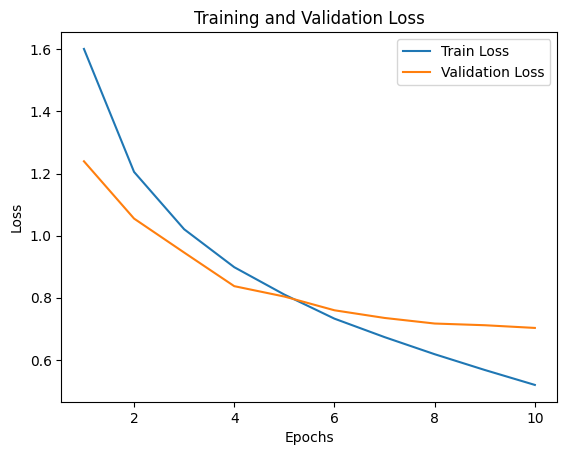

In [27]:
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [28]:
model.eval()
predictions = []
test_loss = 0.0 # 在 test 的時候其實不用算 loss，因為通常我們沒有 test set 的標準答案
test_losses = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        tmp_pred = outputs.argmax(dim=1) # tmp_pred 的型態是 tensor
        predictions.extend(tmp_pred.tolist()) # 如果用 append 的話會變成 [[1, 2, 3], [4, 5, 6]]

        loss = criterion(outputs, labels)
        test_loss += loss.item()
test_losses.append(test_loss / len(test_loader))


# test_labels = [example[1] for example in test_dataset]


accuracy_score(test_labels, predictions)

0.7642

Epoch 1/10, Train Loss: 1.9405, Val Loss: 1.8238
Epoch 2/10, Train Loss: 1.7845, Val Loss: 1.7351
Epoch 3/10, Train Loss: 1.7218, Val Loss: 1.7100
Epoch 4/10, Train Loss: 1.6765, Val Loss: 1.7050
Epoch 5/10, Train Loss: 1.6507, Val Loss: 1.6800
Epoch 6/10, Train Loss: 1.6236, Val Loss: 1.6511
Epoch 7/10, Train Loss: 1.6046, Val Loss: 1.6376
Epoch 8/10, Train Loss: 1.5827, Val Loss: 1.6009
Epoch 9/10, Train Loss: 1.5661, Val Loss: 1.6270
Epoch 10/10, Train Loss: 1.5527, Val Loss: 1.6133


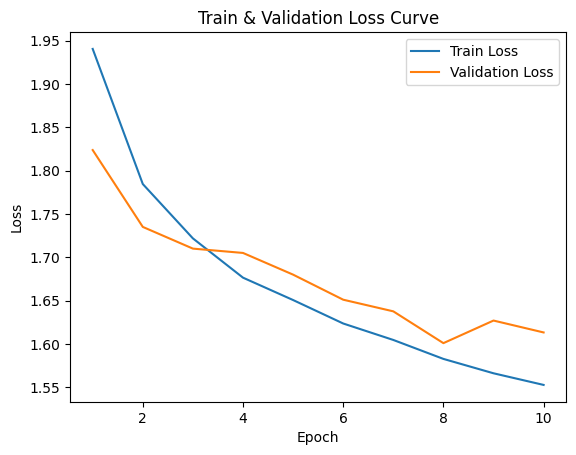

0.4289

In [18]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from torch.utils.data import random_split, DataLoader

# 資料轉換
transform = transforms.ToTensor()

# 載入原始 train set
full_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# 🔹 切分為 train / val
train_size = int(0.9 * len(full_trainset))
val_size = len(full_trainset) - train_size
trainset, valset = random_split(full_trainset, [train_size, val_size])

# DataLoader
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
val_loader = DataLoader(valset, batch_size=64, shuffle=False)
test_loader = DataLoader(testset, batch_size=64, shuffle=False)

# RNN 模型定義
class RNNClassifier(nn.Module):
    def __init__(self, input_size=96, hidden_size=128, num_layers=1, num_classes=10):
        super(RNNClassifier, self).__init__()
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.reshape(x.size(0), 32, -1)  # [B, 32, 96]
        out, _ = self.rnn(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

# 設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNNClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

# 🧩 儲存 loss
train_losses = []
val_losses = []

# 訓練
for epoch in range(num_epochs):
    # Training
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# 🖼️ 繪製 loss 圖
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train & Validation Loss Curve')
plt.legend()
plt.show()

# ✅ 測試：計算 accuracy
model.eval()
predictions = []
test_loss = 0.0 # 在 test 的時候其實不用算 loss，因為通常我們沒有 test set 的標準答案
test_losses = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        tmp_pred = outputs.argmax(dim=1) # tmp_pred 的型態是 tensor
        predictions.extend(tmp_pred.tolist()) # 如果用 append 的話會變成 [[1, 2, 3], [4, 5, 6]]

        loss = criterion(outputs, labels)
        test_loss += loss.item()
test_losses.append(test_loss / len(test_loader))


# test_labels = [example[1] for example in test_dataset]


accuracy_score(test_labels, predictions)
